# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your Emory code below

In [1]:
# Write your answer here:
print(2576217)


2576217


<font size = "5">

Import the "pandas", "matplotlib.pyplot", "numpy", "statsmodels.api", and "statsmodels.formula.api" libraries

In [21]:
# Write your answer here:

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import statsmodels.api 
import statsmodels.formula.api as smf
import os

<font size = "5">

(a) Functions

<font size = "3">

- Read the dataset labelled features.csv.
- Create a ``` lambda ``` function that checks if horsepower $>$ 100
- Create a new list that shows true if horsepower $>$ 100 and false <br>
if horsepower $\leq$ 100.
- Count how many cars have horsewpower $> 100$.

To get full credit use either the apply or the map function <br>
(see Lectures 7 and 8)

In [13]:
# Write your answer here

data = pd.read_csv("/Users/jiang/Documents/qtm151/assignments/06-assignment/Data/features.csv")
#converts horsepower into integers 
data["horsepower"] = pd.to_numeric(data["horsepower"], errors='coerce')
data["hp_above_100"] = data["horsepower"].apply(lambda horsepower: horsepower > 100)
print(data["hp_above_100"].sum())


150


<font size = "5">

(b) Subsetting Data

<font size = "3" >

- Read the dataset labelled features.csv.
- Define a global variable called ```threshold``` that takes the <br>
value 3000
- Subset the data to get one dataset with weight $>$ threshold and <br>
another with weight $\le$ 3000. Use the ```.query()``` function.
- Compute the mean acceleration for each of these datasets.<br>

Note: Review how to define a gloabl variable inside ```.query()```
 

In [20]:
# Write your answer here:

threshold = 3000
cars_above_3000 = data.query("weight > @threshold")
cars_below_3000 = data.query("weight <= @threshold")

print(f"mean acceleration of cars above 3000: {cars_above_3000['acceleration'].mean()}")
print(f"mean acceleration of cars below 3000: {cars_below_3000['acceleration'].mean().round(3)}")

mean acceleration of cars above 3000: 14.7
mean acceleration of cars below 3000: 16.202


<font size = "5">

(c) Regression

<font size = "3">

In this exercise you are asked to plot acceleration vs. weight and to plot <br>
 the best fit line.

- Run a linear regression between acceleration and weight.
- Extract the intercept and coefficient.
- Using your predicted coefficients, compute the predicted value of acceleration
- Plot a scatter plot with acceleration on the y axis and weight on the x axis.
- On that same figure, plot a line with the predicted values of acceleration

Do not forget to label your axes and title.

In [24]:
# Write your answer here:

model1 = smf.ols(formula="acceleration ~ weight", data=data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           acceleration   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.172
Method:                 Least Squares   F-statistic:                     83.58
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           3.24e-18
Time:                        12:48:26   Log-Likelihood:                -929.86
No. Observations:                 398   AIC:                             1864.
Df Residuals:                     396   BIC:                             1872.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.6062      0.459     42.691      0.000      18.703      20.509
weight        -0.0014      0.000     -9.142      0.000      -0.002      -0.001
==============================================================================
Omnibus:                       25.840   Durbin-Watson:                   1.330
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.226
Skew:                           0.582   Prob(JB):                     2.73e-07
Kurtosis:                       3.685   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#from regression
b0 = 19.6062
b1 =  -0.0014 

#defining regression line
data["p"] = b0 + b1*data["weight"]

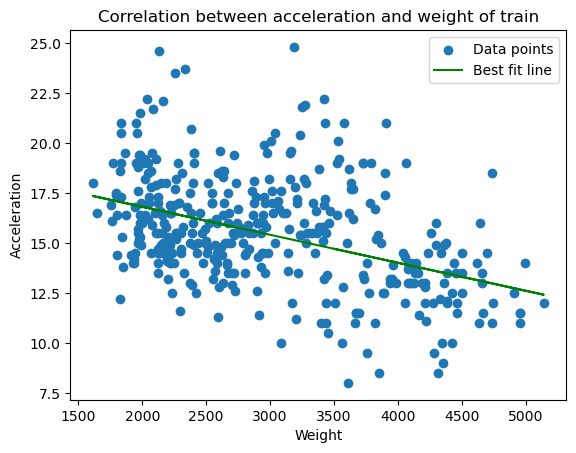

In [27]:
# plot scatterplot 
plt.scatter(x = data["weight"], y = data["acceleration"])
plt.plot(data["weight"],data["p"], color = 'green')
plt.xlabel("Weight")
plt.ylabel("Acceleration")
plt.title("Correlation between acceleration and weight of train")
plt.legend(labels = ["Data points", "Best fit line"])
plt.show()

<font size = "5">

(d) Use sorting + ".iloc[]"

<font size = "3">

- Read the "fifa23_players_basic.csv" dataset
- Use ".sort_values()" to order the "Age" column <br>
from youngest to oldest
- Get a subset with the 5 youngest players

In [40]:
# Write your own code

data2 = pd.read_csv("/Users/jiang/Documents/qtm151/assignments/06-assignment/Data/fifa23_players_basic.csv")

data2 = data2.sort_values(by='Age', ascending=True)
data2.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate
17956,A. Dithmer,Andreas Dithmer,53,76,275000,GK,GK,Denmark,https://cdn.sofifa.net/players/269/573/23_60.png,16,198,82,956,306,F.C. København,500,633000,RES,2025,41,2022,-,Right,2,1,1,-,https://cdn.sofifa.net/flags/dk.png,-,-,Medium,Medium
18014,J. Ardila,José Ardila,53,73,250000,CM,CAM,Venezuela,https://cdn.sofifa.net/players/268/892/23_60.png,16,178,70,1469,312,Estudiantes de Mérida,500,788000,SUB,2024,36,2022,-,Right,3,2,1,-,https://cdn.sofifa.net/flags/ve.png,-,-,Medium,Medium
16084,S. Ngoma,Serge Ngoma,58,82,650000,RW,RM,United States,https://cdn.sofifa.net/players/267/796/23_60.png,16,178,75,1495,340,New York Red Bulls,500,1600000,SUB,2025,22,2022,-,Right,3,2,1,-,https://cdn.sofifa.net/flags/us.png,-,-,High,Medium
11481,O. Vargas,Obed Vargas,64,81,1500000,"CM,CDM,RM",CAM,United States,https://cdn.sofifa.net/players/263/701/23_60.png,16,175,68,1660,353,Seattle Sounders FC,500,3200000,RES,2026,73,2021,-,Right,3,3,1,-,https://cdn.sofifa.net/flags/us.png,-,-,High,Medium
17591,A. Madaliński,Alan Madaliński,54,68,210000,GK,GK,Poland,https://cdn.sofifa.net/players/270/590/23_60.png,16,186,76,838,287,Miedź Legnica,500,415000,RES,2024,12,2021,-,Right,3,1,1,-,https://cdn.sofifa.net/flags/pl.png,-,-,Medium,Medium


<font size = "5">

(e) Use queries + global variables

<font size = "3">

- Read the "fifa23_players_basic.csv" dataset
- Compute the mean of the column "Value(in Euro)" <br>
and store it as a variable
- Subset the players whose value is above the mean value <br>
  using ".query()"


HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 10) <br>
Reference the column as ``` `Value(in Euro)`    ``` inside .query()

In [44]:
# Write your own code

mean_value = data2['Value(in Euro)'].mean()
data3 = data2.query("`Value(in Euro)` > @mean_value")

data3

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate
5270,A. Güler,Arda Güler,69,86,3500000,"CAM,CM,RW",CAM,Turkey,https://cdn.sofifa.net/players/264/309/23_60.png,17,176,61,1772,360,Fenerbahçe SK,3000,8800000,RES,2025,10,2021,-,Left,3,3,1,-,https://cdn.sofifa.net/flags/tr.png,-,-,Medium,Medium
6918,A. Nusa,Antonio Nusa,68,88,3300000,"LW,RW,ST",LW,Norway,https://cdn.sofifa.net/players/262/863/23_60.png,17,180,73,1684,367,Club Brugge KV,2000,7900000,SUB,2025,32,2021,-,Right,4,4,1,-,https://cdn.sofifa.net/flags/no.png,-,-,Medium,Medium
5658,Y. Moukoko,Youssoufa Moukoko,69,88,3500000,ST,ST,Germany,https://cdn.sofifa.net/players/240/833/23_60.png,17,175,73,1733,375,Borussia Dortmund,4000,8100000,SUB,2023,18,2020,-,Left,4,4,1,-,https://cdn.sofifa.net/flags/de.png,-,-,Medium,Medium
531,Gavi,Pablo Martín Páez Gavira,79,88,36000000,"CM,LW,RW",CAM,Spain,https://cdn.sofifa.net/players/264/240/23_60.png,17,173,68,2022,432,FC Barcelona,17000,81000000,SUB,2026,30,2020,-,Right,3,3,1,-,https://cdn.sofifa.net/flags/es.png,-,-,High,High
5899,W. Gnonto,Wilfried Gnonto,69,85,3600000,"ST,LM",CAM,Italy,https://cdn.sofifa.net/players/258/906/23_60.png,18,170,71,1741,384,Leeds United,8000,9100000,SUB,2027,29,2022,-,Right,3,3,1,-,https://cdn.sofifa.net/flags/it.png,-,-,Medium,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,G. Chiellini,Giorgio Chiellini,84,84,7500000,CB,CB,Italy,https://cdn.sofifa.net/players/138/956/23_60.png,37,187,85,1815,397,Los Angeles FC,11000,11300000,CB,2023,14,2022,-,Left,3,2,4,-,https://cdn.sofifa.net/flags/it.png,-,-,Medium,High
50,Thiago Silva,Thiago Emiliano da Silva,86,86,12000000,CB,CB,Brazil,https://cdn.sofifa.net/players/164/240/23_60.png,37,183,79,2012,411,Chelsea,115000,22200000,CB,2023,6,2020,-,Right,3,2,4,-,https://cdn.sofifa.net/flags/br.png,-,-,Medium,High
251,Ł. Fabiański,Łukasz Fabiański,82,82,3400000,GK,GK,Poland,https://cdn.sofifa.net/players/164/835/23_60.png,37,190,83,1260,449,West Ham United,43000,6500000,GK,2023,1,2018,-,Right,2,1,2,-,https://cdn.sofifa.net/flags/pl.png,-,-,Medium,Medium
451,José Fonte,José Miguel da Rocha Fonte,80,80,3800000,CB,CB,Portugal,https://cdn.sofifa.net/players/171/791/23_60.png,38,191,81,1736,363,LOSC Lille,26000,7200000,CB,2023,6,2018,-,Right,3,2,3,Portugal,https://cdn.sofifa.net/flags/pt.png,SUB,24,Medium,High


<font size = "5">